In [1]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=10000)
fares = pd.read_csv(trip_fare_file, nrows=10000)

In [2]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()


In [3]:
full_tripdata.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.022200,2.133800,719.343200,2.808752,-72.963232,40.211495,-72.940461,40.187411,11.826250,0.641150,0.499250,1.319314,0.167057,14.453021
std,0.230461,1.728582,506.055188,2.980911,8.599727,4.647672,8.691804,4.754211,8.992315,0.245067,0.019351,1.866007,0.966976,10.540082
min,1.000000,1.000000,0.000000,0.000000,-74.044479,0.000000,-74.177055,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,1.000000,1.000000,360.000000,1.100000,-73.992548,40.731696,-73.992090,40.729538,6.500000,0.500000,0.500000,0.000000,0.000000,8.300000
50%,1.000000,1.000000,600.000000,1.840000,-73.982956,40.750097,-73.981930,40.749583,9.000000,0.500000,0.500000,1.000000,0.000000,11.500000
75%,1.000000,3.000000,960.000000,3.300000,-73.968735,40.765412,-73.963455,40.768214,14.000000,1.000000,0.500000,2.000000,0.000000,16.500000
max,5.000000,6.000000,7500.000000,29.610000,0.000000,41.453693,0.000000,40.993900,170.000000,1.000000,0.500000,30.000000,15.990000,180.000000


In [4]:
pickupLoc = pd.DataFrame(full_tripdata.iloc[:,10:12])
pickupLoc = pickupLoc.rename(columns={' pickup_longitude':'longtitude', ' pickup_latitude':'latitude'})
dropoffLoc = pd.DataFrame(full_tripdata.iloc[:,12:14])
dropoffLoc = pickupLoc.rename(columns={' dropoff_longitude':'longtitude', ' dropoff_latitude':'latitude'})

loc = pd.concat([pickupLoc,dropoffLoc],axis=0)

In [5]:
loc.count()

longtitude    20000
latitude      20000
dtype: int64

In [6]:
loc_frequency = pd.DataFrame({"longtitude":loc.groupby( [ "longtitude", "latitude"] )["longtitude"],"latitude":loc.groupby( [ "longtitude", "latitude"] )["latitude"],'count' : loc.groupby( [ "longtitude", "latitude"] ).count()})


loc_frequency.head()

ValueError: cannot copy sequence with size 0 to array axis with dimension 9836

In [7]:
locs_frequency = locs_in_NYC.groupby(['PickupDIST','DropoffDIST']).count()

NameError: name 'locs_in_NYC' is not defined

In [64]:
#try to use K-mean to cluster the locations together 

locations = loc.copy()

locations = locations.drop_duplicates()


In [65]:
locations = locations.drop(index=[1],axis=0)

In [66]:
locations.columns
locations = locations.loc[(locations['longtitude'] != 0) & (locations['latitude'] != 0)]

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

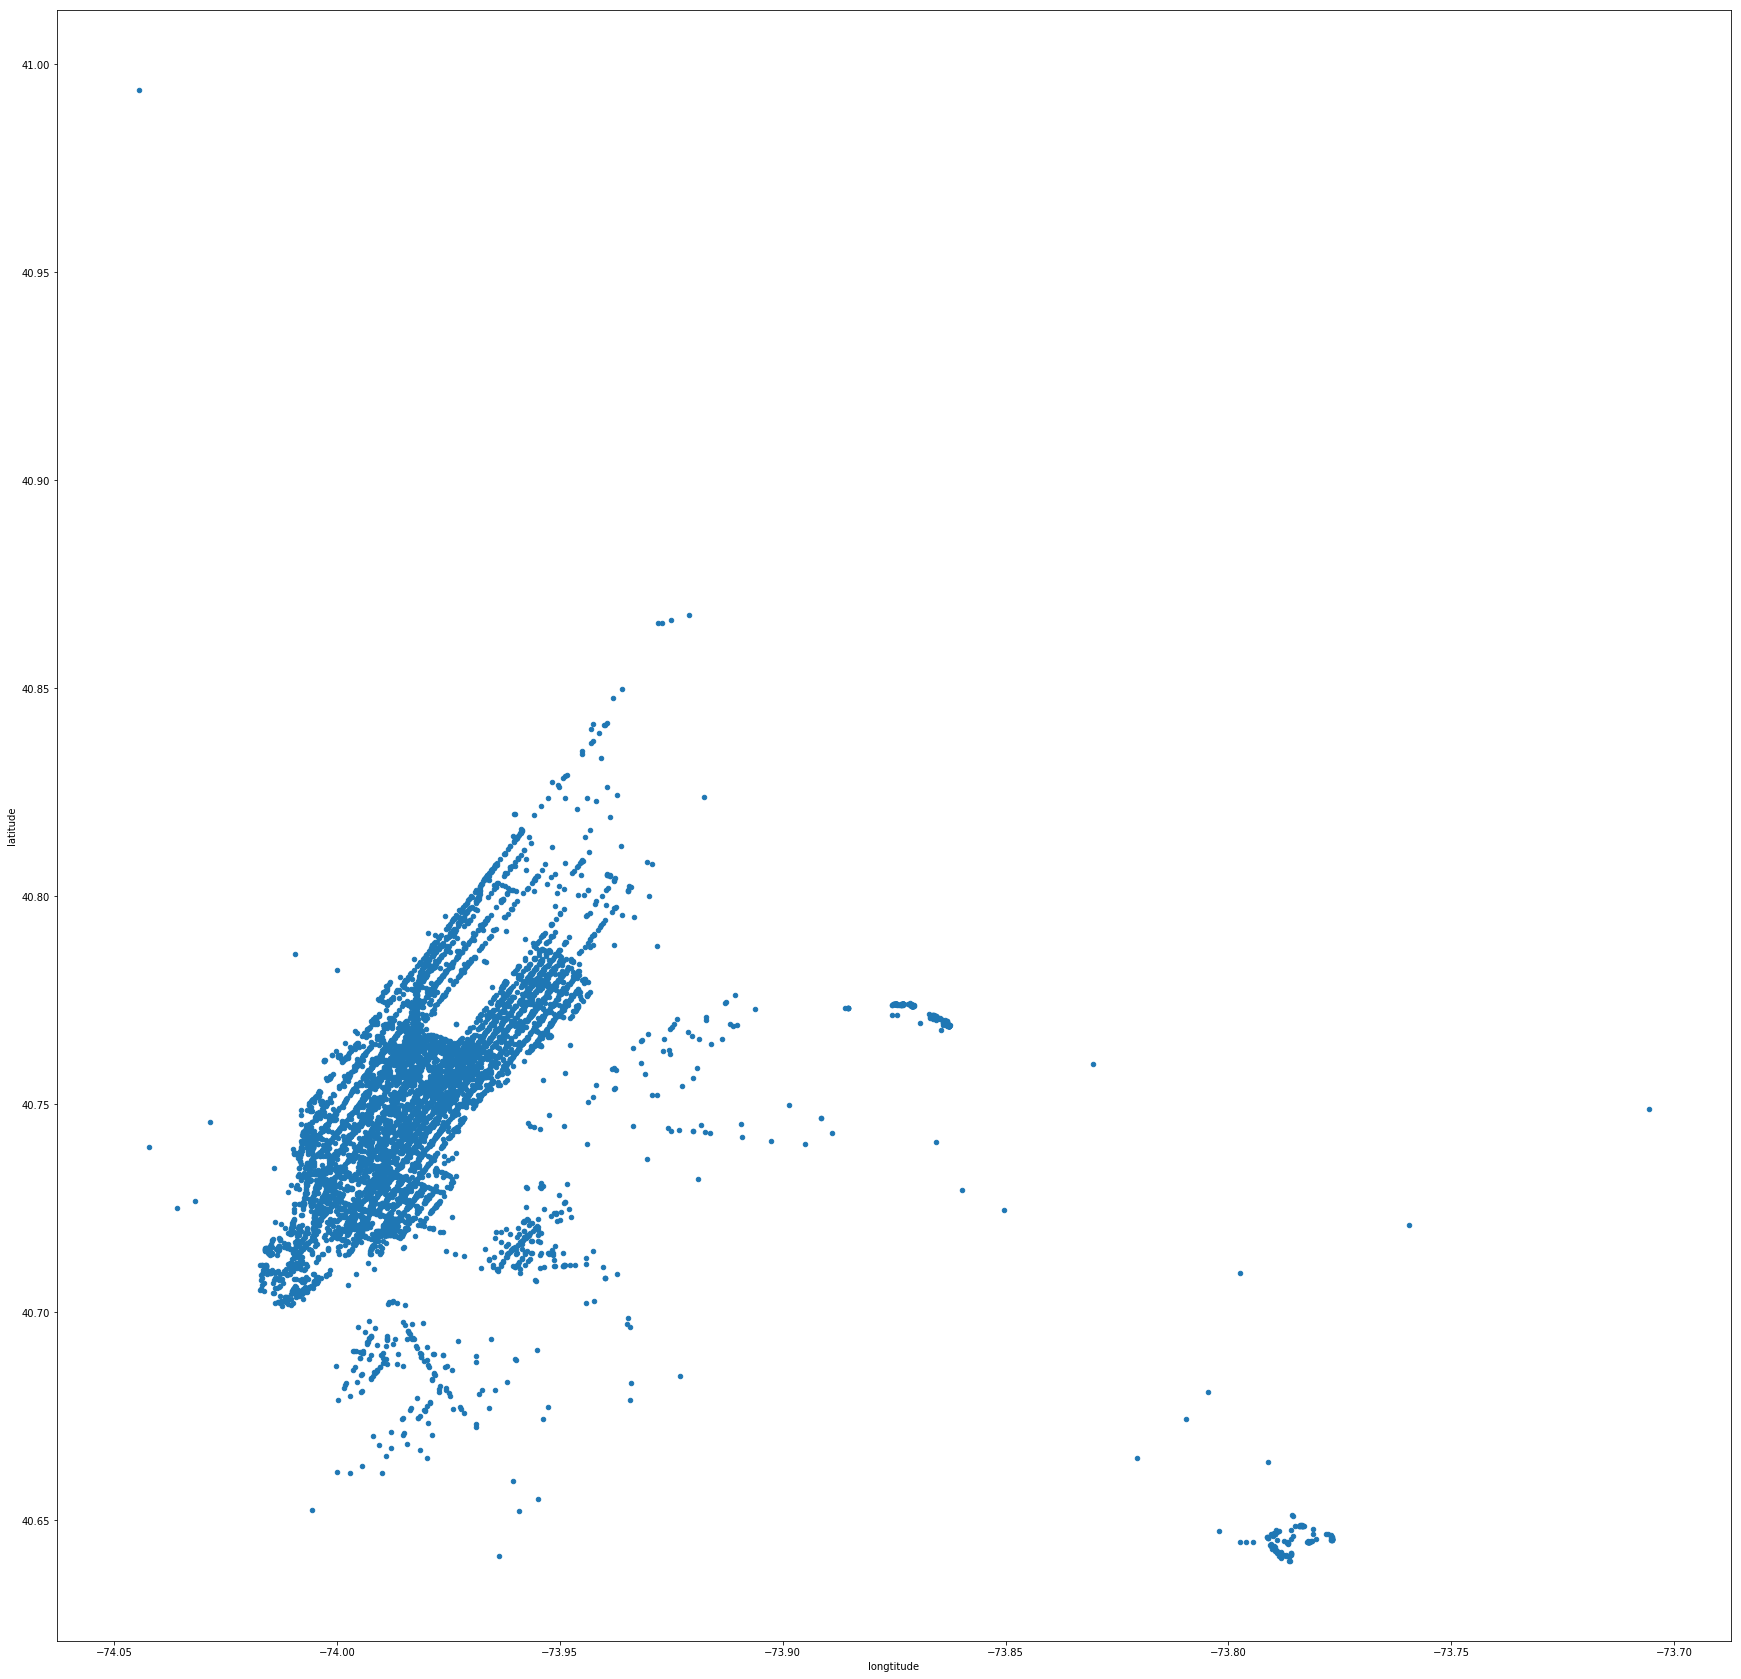

In [71]:
#locations.describe()
#locations.sort_values(by=['latitude'])
locations.plot.scatter(x="longtitude",y="latitude",figsize=(30,30))

In [84]:
from sklearn.cluster import KMeans

training = locations.as_matrix()

kmeans = KMeans(n_clusters=200).fit(training)

In [85]:
#kmeans.labels_

In [86]:
#kmeans.cluster_centers_

9829


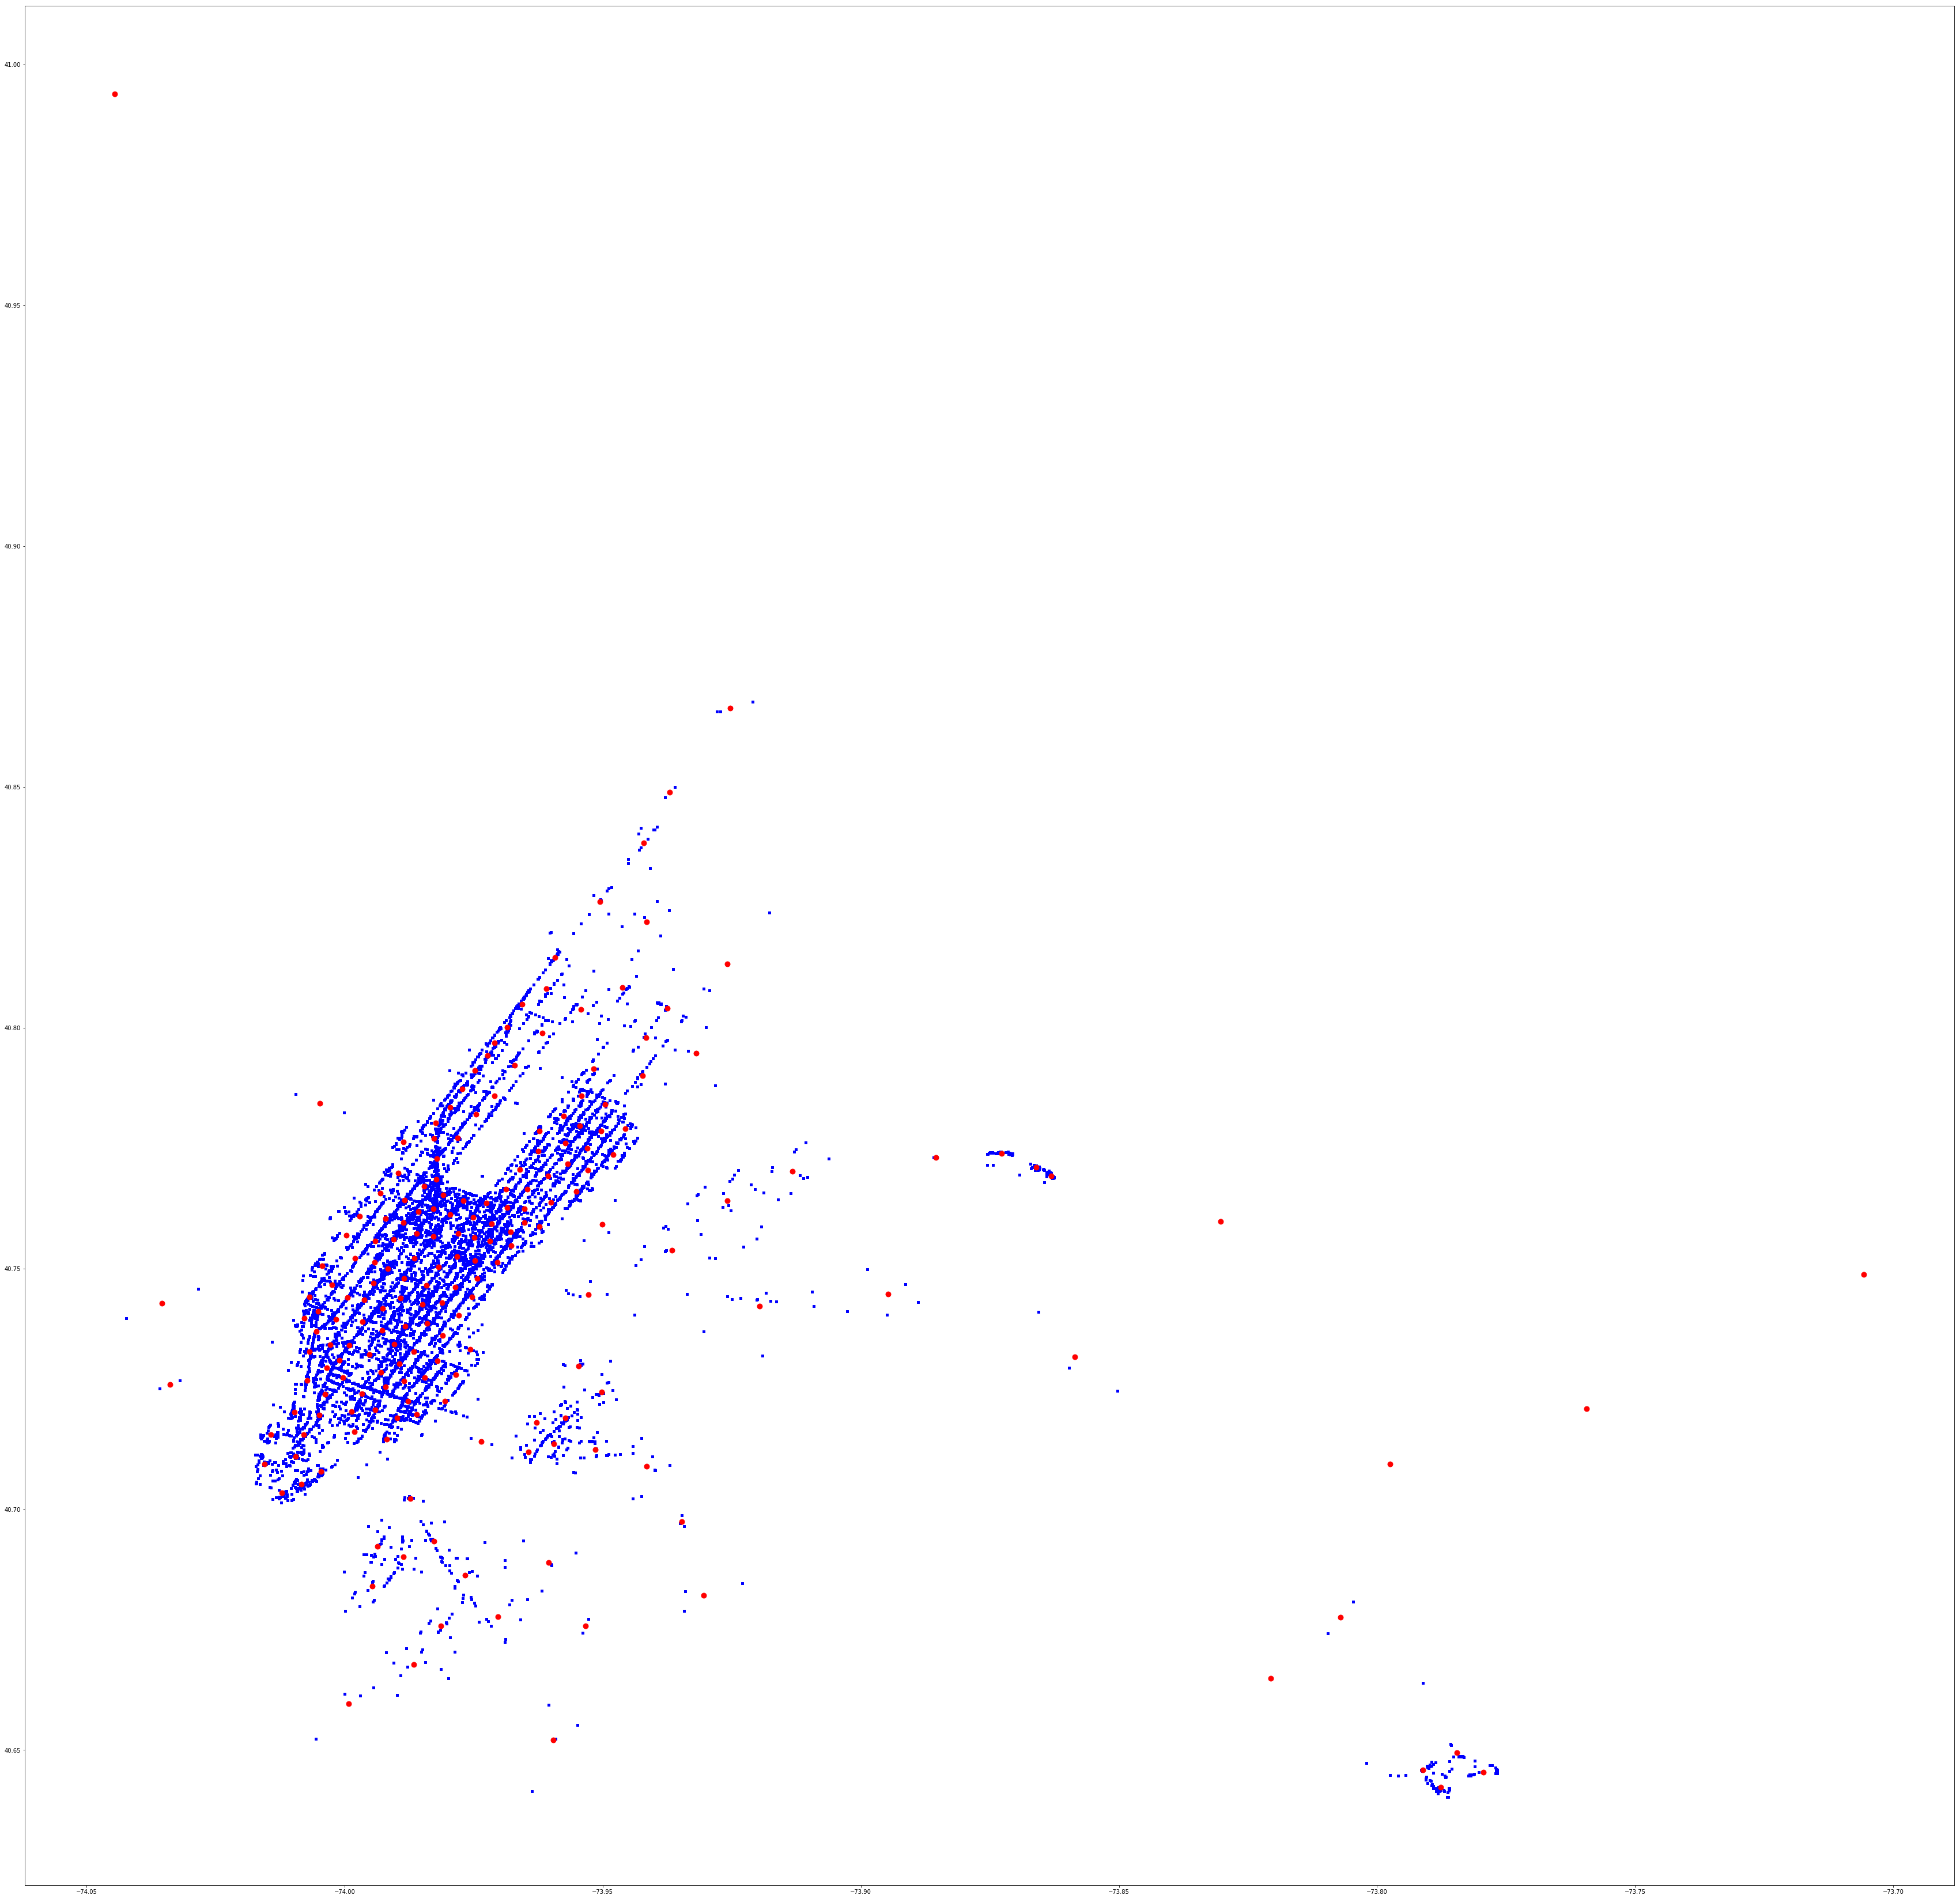

In [88]:
# Visulase the Trip locations and cluster center together, to validate the trainin result

cluster_centers = kmeans.cluster_centers_
fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(111)
print len(training[:,0])
ax1.scatter(training[:,0], training[:,1], s=10, c='b', marker="s", label='loc')
ax1.scatter(cluster_centers[:,0],cluster_centers[:,1], s=80, c='r', marker="o", label='center')
#plt.legend(loc='upper left');
plt.show()